In [146]:
#Requisitos e conexão

#importar as bibliotecas que serão utilizadas
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import pandas as pd

df = pd.read_csv('DADOS/MICRODADOS_ENEM_2021.csv', encoding = "ISO-8859-1", sep = ';')


In [147]:
#Verificando dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [148]:
#Verifica Valores Nulos
df.isnull().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               2
Q022               2
Q023               2
Q024               2
Q025               2
Length: 76, dtype: int64

In [149]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [150]:
#Total de inscritos
df['NU_INSCRICAO'].count()

#Porcentagem de inscritos por estado
print("Porcentagem de inscritos por estado:")
result = df['SG_UF_PROVA'].value_counts()/df.shape[0]*100
result.round(2)

Porcentagem de inscritos por estado:


SP    15.04
MG     9.67
BA     7.85
RJ     7.03
CE     6.51
PE     5.71
PA     5.49
RS     4.44
PR     4.26
GO     4.04
MA     3.77
PB     3.01
AM     2.65
RN     2.38
SC     2.38
PI     2.36
DF     1.99
ES     1.89
AL     1.67
MT     1.65
SE     1.59
MS     1.25
RO     0.97
TO     0.91
AP     0.64
AC     0.60
RR     0.24
Name: SG_UF_PROVA, dtype: float64

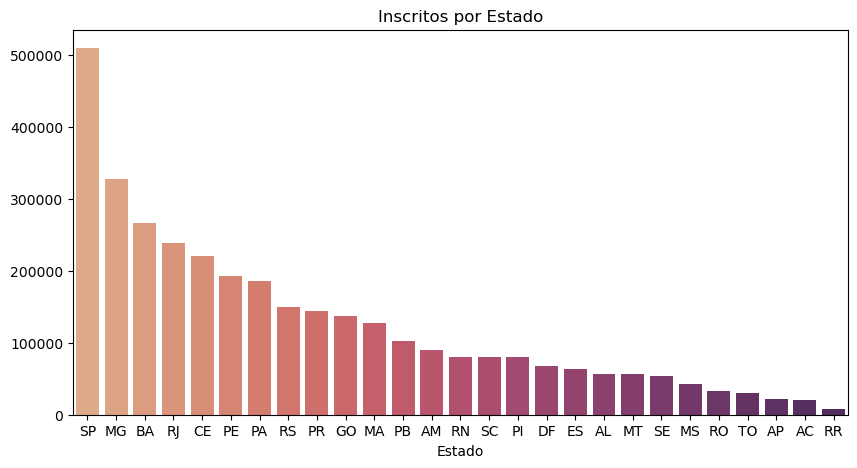

In [151]:
#quantidade de participantes por estado
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='SG_UF_PROVA',data=df,palette='flare',order = df['SG_UF_PROVA'].value_counts().index)
plt.xlabel('Estado')
plt.ylabel("")
plt.title('Inscritos por Estado')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [152]:

print("Quantidade total de inscritos: ",df['NU_INSCRICAO'].count())
inscritos_tot = df['NU_INSCRICAO'].count()

Quantidade total de inscritos:  3389832


In [153]:
#Remove inscritos que não participaram dos dois dias de prova.
df = df.loc[((df.TP_PRESENCA_CN == 1) & (df.TP_PRESENCA_CH == 1))]
#Quantidade de inscricoes que realizaram as duas provas

inscritos_tot_final = df['NU_INSCRICAO'].count()
print('Total de inscritos que realizaram as duas provas:',df['NU_INSCRICAO'].count())

Total de inscritos que realizaram as duas provas: 2238107


In [154]:
#Abstenção
abstencao = inscritos_tot - inscritos_tot_final
print("Total de inscritos que não realizaram as duas provas:",abstencao)

#Abstenção em porcentagem
abstencao_porc = inscritos_tot_final/inscritos_tot*100
tot_porc = 100 - abstencao_porc
print("O total de abstenção foi de de ",tot_porc.round(2),"%")

Total de inscritos que não realizaram as duas provas: 1151725
O total de abstenção foi de de  33.98 %


In [155]:
#Media da nota
#cria coluna nota média baseada na soma das 5 provas
df['NOTA_MEDIA'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']) / 5

In [156]:
df['SG_UF_PROVA'].value_counts()

SP    350149
MG    219297
BA    174793
RJ    157663
CE    142823
PE    131527
PA    119357
RS    100882
PR     96115
MA     84915
GO     83844
PB     70800
PI     56661
RN     56363
SC     54294
DF     45005
AM     44560
ES     42048
AL     38703
SE     37363
MT     35031
MS     26855
TO     19799
RO     18704
AP     12997
AC     12718
RR      4841
Name: SG_UF_PROVA, dtype: int64

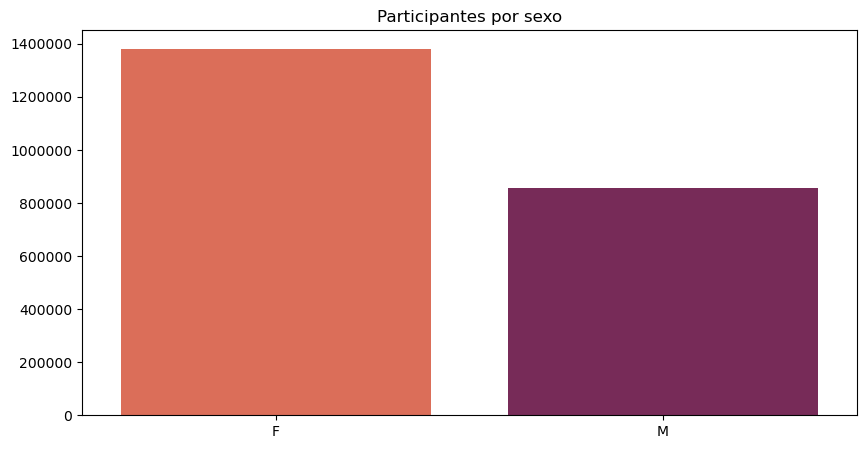

Quantidade de Participantes por Sexo:
F    1381949
M     856158
Name: TP_SEXO, dtype: int64


In [157]:
#Quantidade de Parcitipantes por sexo
#Gráfico
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_SEXO',data=df,palette='rocket_r',order = df['TP_SEXO'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Participantes por sexo')
plt.ticklabel_format(style='plain', axis='y')
plt.show()
print("Quantidade de Participantes por Sexo:")
print(df['TP_SEXO'].value_counts())

In [158]:
#Renomeia Campos
df['Q006'] = df['Q006'].map({'A':'Nenhuma renda', 'B':'Até 998,00', 'C':'De 998,01 até 1.497,00', 'D':'De 1.497,01 até 1.996,00', 'E':'De 1.996,01 até 2.495,00', 'F':'De 2.495,01 até 2.994,00', 'G':'De 2.994,01 até 3.992,00', 'H':'De 3.992,01 até 4.990,00', 'I':'De 4.990,01 até 5.988,00', 'J':'De 5.988,01 até 6.986,00', 'K':'De 6.986,01 até 7.984,00', 'L':'De 7.984,01 até 8.982,00', 'M':'De 8.982,01 até 9.980,00', 'N':'De 9.980,01 até 11.976,00', 'O':'De 11.976,01 até 14.970,00', 'P':'De 14.970,01 até 19.960,00', 'Q':'Mais de 19.960,00'})

#Quantidade de participantes por renda familiar
df['Q006'].value_counts()


Até 998,00                    546733
De 998,01 até 1.497,00        346838
De 1.497,01 até 1.996,00      277708
De 2.495,01 até 2.994,00      168049
De 2.994,01 até 3.992,00      147647
De 1.996,01 até 2.495,00      143957
De 3.992,01 até 4.990,00      118749
Nenhuma renda                 112899
De 4.990,01 até 5.988,00       75420
De 8.982,01 até 9.980,00       47849
De 5.988,01 até 6.986,00       46934
Mais de 19.960,00              39914
De 6.986,01 até 7.984,00       37157
De 11.976,01 até 14.970,00     32862
De 14.970,01 até 19.960,00     32802
De 7.984,01 até 8.982,00       32560
De 9.980,01 até 11.976,00      30028
Name: Q006, dtype: int64

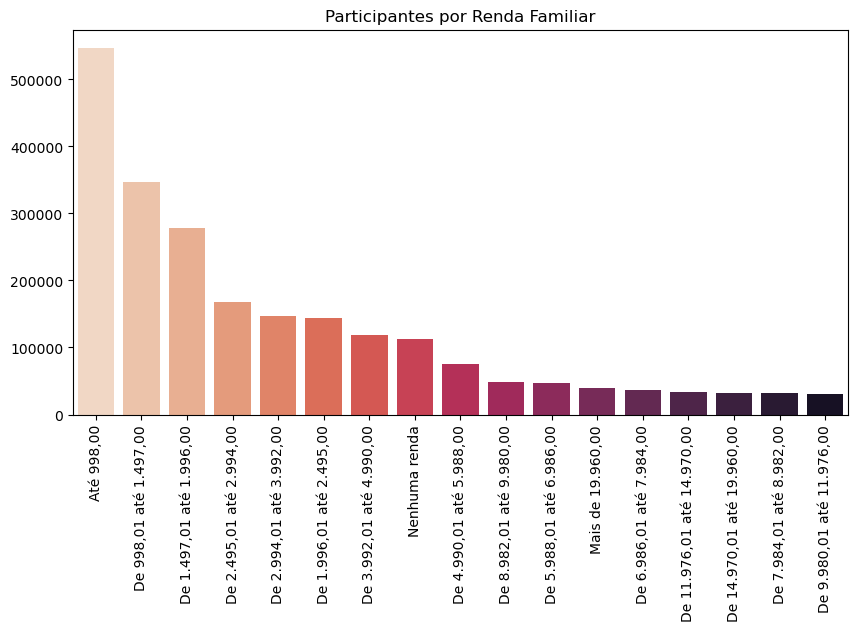

In [159]:
#Gráfico - Quantidade de participantes por renda familiar
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Q006',data=df,palette='rocket_r', order = df['Q006'].value_counts().index)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel("")
plt.title('Participantes por Renda Familiar')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [160]:
#Altera Campos Cor
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({0:'Não declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})
#Participantes por Raça e Cor
df['TP_COR_RACA'].value_counts()

Branca           979456
Parda            912861
Preta            246568
Amarela           44947
Não declarado     43733
Indígena          10540
Name: TP_COR_RACA, dtype: int64

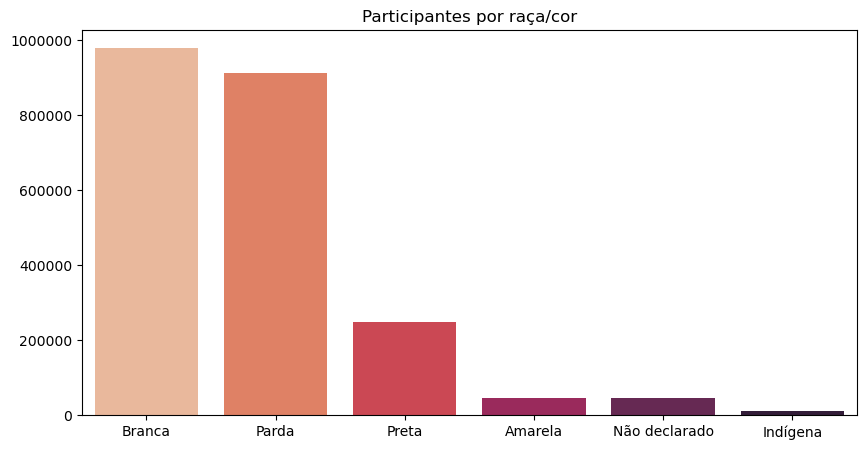

In [161]:
#Gráfico - Quantidade de participantes por raça/cor
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_COR_RACA',data=df,palette='rocket_r',order = df['TP_COR_RACA'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Participantes por raça/cor')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

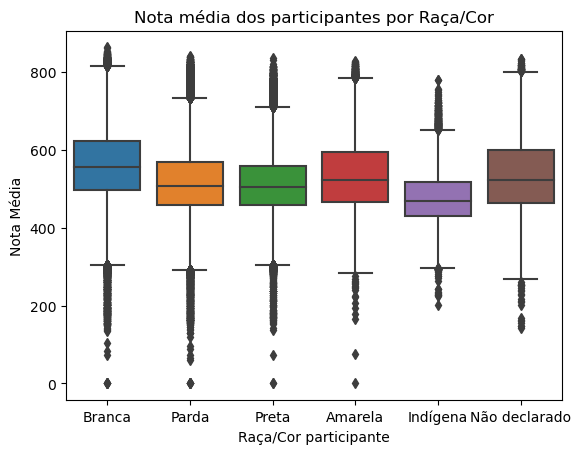

In [162]:
#Gráfico - Nota Média por Sexo
sns.boxplot(x=df['TP_COR_RACA'], y=df['NOTA_MEDIA'])
plt.title('Nota média dos participantes por Raça/Cor')
plt.xlabel("Raça/Cor participante")
plt.ylabel("Nota Média")
plt.show()

In [163]:
#Altera Campos
df['TP_ESCOLA'] = df['TP_ESCOLA'].map({1:'Não Respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'})
#Participantes por escola
print("Número de participantes por escola:")
df['TP_ESCOLA'].value_counts()

Número de participantes por escola:


Não Respondeu    1390710
Pública           668036
Privada           179361
Name: TP_ESCOLA, dtype: int64

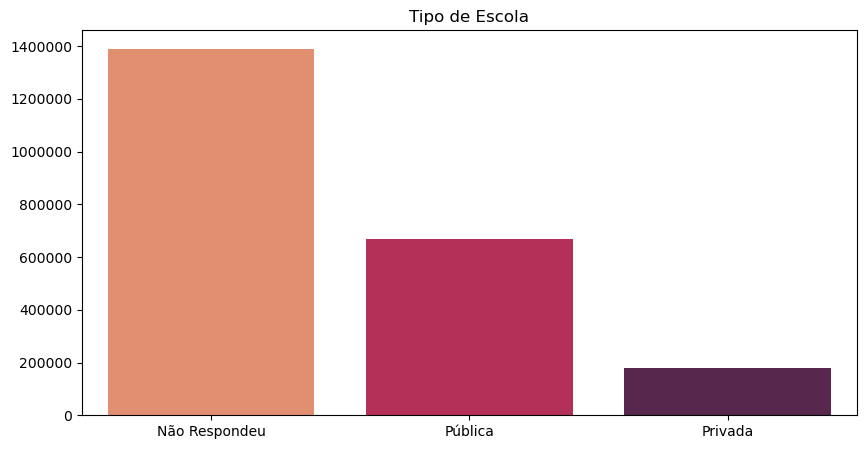

In [164]:
#Gráfico - Tipo de escola
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='TP_ESCOLA',data=df,palette='rocket_r',order = df['TP_ESCOLA'].value_counts().index)
plt.xlabel('')
plt.ylabel("")
plt.title('Tipo de Escola')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [165]:
#Altera Campos
df['Q025'] = df['Q025'].map({'A':'Não', 'B':'Sim'})
#Possui internet em casa?
print("Participantes que possuem internet em casa:")
df['Q025'].value_counts()

Participantes que possuem internet em casa:


Sim    2048739
Não     189367
Name: Q025, dtype: int64

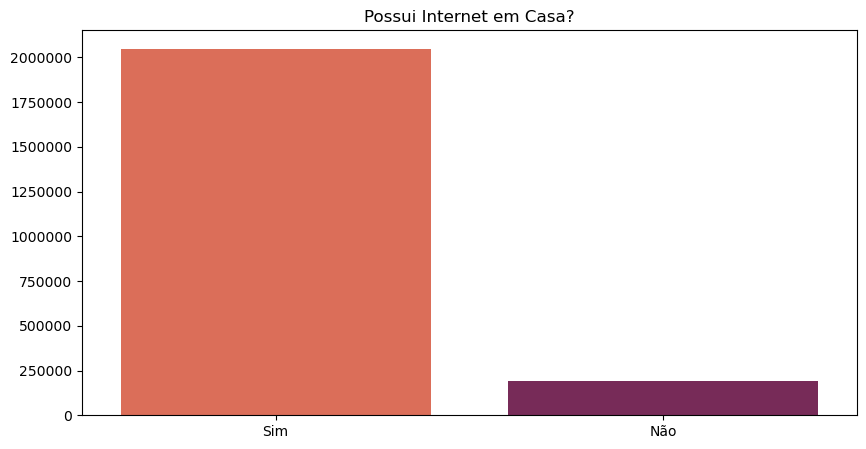

In [166]:
#Gráfico - Participantes que possuem internet em casa
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Q025',data=df,palette='rocket_r',order = df['Q025'].value_counts().index)
plt.ylabel("")
plt.xlabel("")
plt.title('Possui Internet em Casa?')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [173]:
#Altera Campos
##Participantes por faixa etária
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].map({1:'-17', 2:'17', 3:'18', 4:'19', 5:'20', 6:'21', 7:'22', 8:'23', 9:'24', 10:'25', 11:'26-30', 12:'31-35', 13:'36-40', 14:'41-45', 15:'46-50', 16:'51-55', 17:'56-60', 18:'61-65', 19:'66-70', 20:'70+'})
print("Faixa etária dos participantes:", df['TP_FAIXA_ETARIA'].value_counts())

Faixa etária dos participantes: Series([], Name: TP_FAIXA_ETARIA, dtype: int64)


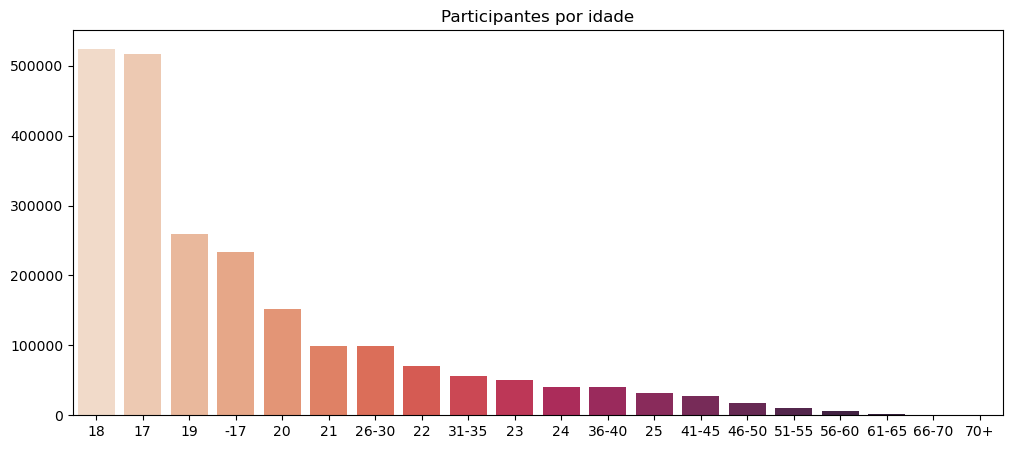

In [168]:
#Gráfico - Participantes por faixa etária

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='TP_FAIXA_ETARIA',data=df,palette='rocket_r',order = df['TP_FAIXA_ETARIA'].value_counts().index)
plt.ylabel("")
plt.xlabel("")
plt.title('Participantes por idade')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

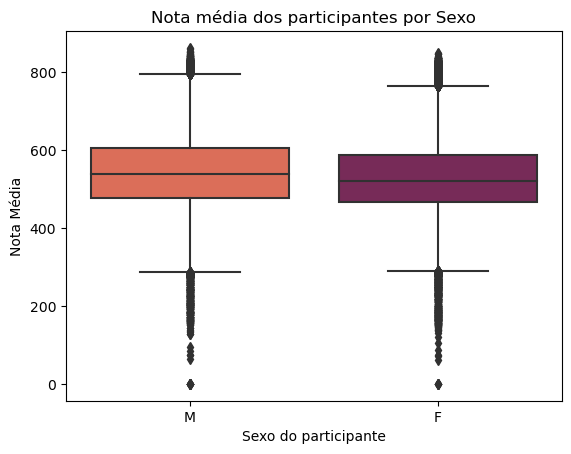

In [169]:
#Gráfico - Nota Média por Sexo
sns.boxplot(x=df['TP_SEXO'], y=df['NOTA_MEDIA'],palette='rocket_r')
plt.title('Nota média dos participantes por Sexo')
plt.xlabel("Sexo do participante")
plt.ylabel("Nota Média")
plt.show()

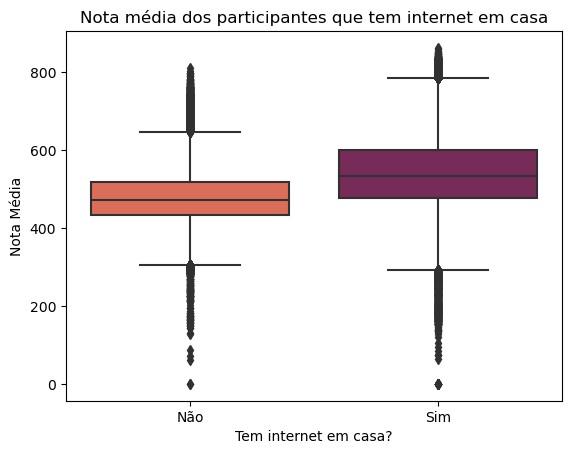

In [170]:
sns.boxplot(x=df['Q025'], y=df['NOTA_MEDIA'], palette='rocket_r')
plt.title('Nota média dos participantes que tem internet em casa')
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota Média")
plt.show()